## `Dataset` Class

In [1]:
import numpy as np

class Dataset:
    def __init__(self, train=True):
        self.train = train
        self.data = None
        self.label = None
        self.prepare()
        
    def __getitem__(self, index):
        assert np.isscalar(index)
        if self.label is None:
            return self.data[index], None
        else:
            return self.data[index], self.label[index]
        
    def __len__(self):
        return len(self.data)
    
    def prepare(self):
        pass

Let's make `Spiral` class using it!

In [2]:
class Spiral(Dataset):
    def prepare(self):
        self.data, self.label = get_spiral(self.train)

In [2]:
import dezero

train_set = dezero.datasets.Spiral(train=True)

print(train_set[0])
print(len(train_set))

(array([-0.13981389, -0.00721657], dtype=float32), 1)
300


## Case of `Big data`

we cannot maintain the big data at once at Dataset class.<br>
So we have to load everytime when we use it!

```python
class BigData(Dataset):
    def __getitem__(self, index):
        x = np.load("data/{}.npy".format(index))
        y = np.load("data/{}.npy".format(index))
        
        return x, y
    
    def __len__():
        return 1000000
```

## Attach along the `datas`

`Dataset` give you one data by one.<br>
Let's attach this data all together

In [3]:
import dezero

train_set = dezero.datasets.Spiral(train=True)

batch_index = [0, 1, 2]
batch = [train_set[i] for i in batch_index]
batch

[(array([-0.13981389, -0.00721657], dtype=float32), 1),
 (array([0.37049392, 0.5820947 ], dtype=float32), 1),
 (array([ 0.1374263 , -0.17179643], dtype=float32), 2)]

Let's make `x, y` data

In [4]:
x = np.array([example[0] for example in batch])
y = np.array([example[1] for example in batch])

print(x, x.shape)
print(y, y.shape)

[[-0.13981389 -0.00721657]
 [ 0.37049392  0.5820947 ]
 [ 0.1374263  -0.17179643]] (3, 2)
[1 1 2] (3,)


## Train

In [6]:
import math
import numpy as np
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = dezero.datasets.Spiral()
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(train_set)
max_iter = math.ceil(data_size / batch_size)

In [7]:
epoch_list = []
loss_list = []

for epoch in range(max_epoch):
    index = np.random.permutation(data_size)
    sum_loss = 0
    
    for i in range(max_iter):
        # mini batch
        batch_index = index[i*batch_size:(i + 1)*batch_size]
        batch = [train_set[i] for i in batch_index]
        
        batch_x = np.array([example[0] for example in batch])
        batch_y = np.array([example[1] for example in batch])

        # model train
        y_pred = model(batch_x)
        loss = F.softmax_cross_entropy(y_pred, batch_y)
        
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(batch_y)
        
    avg_loss = sum_loss / data_size
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))
    
    epoch_list.append(epoch + 1)
    loss_list.append(avg_loss)

epoch 1, loss 1.13
epoch 2, loss 1.05
epoch 3, loss 0.95
epoch 4, loss 0.92
epoch 5, loss 0.87
epoch 6, loss 0.89
epoch 7, loss 0.84
epoch 8, loss 0.78
epoch 9, loss 0.80
epoch 10, loss 0.79
epoch 11, loss 0.78
epoch 12, loss 0.76
epoch 13, loss 0.77
epoch 14, loss 0.76
epoch 15, loss 0.76
epoch 16, loss 0.77
epoch 17, loss 0.78
epoch 18, loss 0.74
epoch 19, loss 0.74
epoch 20, loss 0.72
epoch 21, loss 0.73
epoch 22, loss 0.74
epoch 23, loss 0.77
epoch 24, loss 0.73
epoch 25, loss 0.74
epoch 26, loss 0.74
epoch 27, loss 0.72
epoch 28, loss 0.72
epoch 29, loss 0.72
epoch 30, loss 0.73
epoch 31, loss 0.71
epoch 32, loss 0.72
epoch 33, loss 0.72
epoch 34, loss 0.71
epoch 35, loss 0.72
epoch 36, loss 0.71
epoch 37, loss 0.71
epoch 38, loss 0.70
epoch 39, loss 0.71
epoch 40, loss 0.70
epoch 41, loss 0.71
epoch 42, loss 0.70
epoch 43, loss 0.70
epoch 44, loss 0.70
epoch 45, loss 0.69
epoch 46, loss 0.69
epoch 47, loss 0.71
epoch 48, loss 0.70
epoch 49, loss 0.69
epoch 50, loss 0.69
epoch 51,

### Loss graph

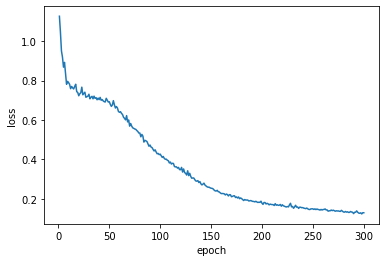

In [8]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Decision boundary

In [14]:
x0s = []
x1s = []
ys = []
for i in range(len(train_set)):
    x_i, y_i = train_set[i]
    x0s.append(x_i[0])
    x1s.append(x_i[1])
    ys.append(y_i)
    
x0s, x1s, ys = np.array(x0s), np.array(x1s), np.array(ys)

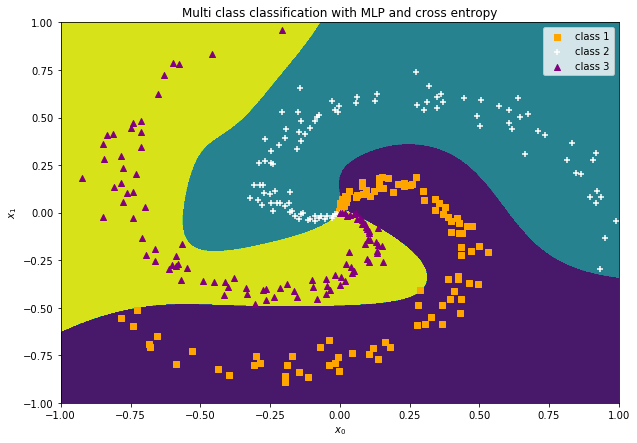

In [15]:
x0_min, x0_max = -1, 1
x1_min, x1_max = -1, 1

XX0, XX1 = np.meshgrid(np.arange(x0_min, x0_max, (x0_max - x0_min)/1000),
                       np.arange(x0_min, x0_max, (x0_max - x0_min)/1000))
XS = np.array([XX0.ravel(), XX1.ravel()]).T

predict_y = model(XS)
YY = np.reshape(np.argmax(predict_y.data, axis=1), XX0.shape)

plt.figure(figsize=(10, 7))
plt.contourf(XX0, XX1, YY)

colormap = plt.cm.get_cmap('rainbow', 3)
colors = ['orange', 'white', 'purple']
markers = ["s", "+", "^"]
for i in range(3):
    index = ys == i
    marker = markers[i]
    color = colors[i]
    plt.scatter(x0s[index], x1s[index], c=color, cmap=colormap, marker=marker, label=f"class {i + 1}")
    
plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)

plt.xlabel("$x_0$")
plt.ylabel("$x_1$")

plt.title('Multi class classification with MLP and cross entropy')
plt.legend()
plt.show()

## `Dataset` class preprocessing function

`Preprocessing` is often done at data preprocessing!<br>
Often called **`Data Augmentation`**!

In [16]:
import numpy as np

class Dataset:
    def __init__(self, train=True, transform=None, target_transform=None):
        self.train = train
        
        # Transformation
        self.transform = transform
        self.target_transform  = target_transform
        if self.transform is None:
            self.transform = lambda x: x
        if self.target_transform is None:
            self.target_transform = lambda x: x
            
        self.data = None
        self.label = None
        self.prepare()
        
    def __getitem__(self, index):
        assert np.isscalar(index)
        if self.label is None:
            return self.transform(self.data[index]), None
        else:
            return self.transform(self.data[index]), \
                   self.target_transform(self.label[index])
        
    def __len__(self):
        return len(self.data)
    
    def prepare(self):
        pass

### Data preprocessing - `Scaling`

In [3]:
import dezero

def f(x):
    y = x / 2.0
    return y

train_set_scaling = dezero.datasets.Spiral(transform=f)
train_set = dezero.datasets.Spiral()

In [4]:
train_set[0], train_set_scaling[0]

((array([-0.13981389, -0.00721657], dtype=float32), 1),
 (array([-0.06990694, -0.00360829], dtype=float32), 1))

We can see the data set it well scaled! :)

## More `Data Augmentation!`
- `PIL Image` Transformation
    - Convert
    - Resize
    - CentorCrop
    - ToArray
    - ToPIL
    - etc
    
- `NumPy ndarray` Transformation
    - Normalize
    - Flatten
    - AsType
    - ToInt
    - etc
    

In [ ]:
import numpy as np
try:
    import Image
except ImportError:
    from PIL import Image
from dezero.utils import pair

In [5]:
def pair(x):
    if isinstance(x, int):
        return (x, x)
    elif isinstance(x, tuple):
        assert len(x) == 2
        return x
    else:
        raise ValueError

### `PIL Image` Transformation - `Convert`

In [6]:
class Convert:
    def __init__(self, mode='RGB'):
        self.mode = mode
        
    def __call__(self, img):
        if self.mode == 'BGR':
            img = img.convert('RGB')
            r, g, b = img.split()
            img = Image.merge('RGB', (b, g, r))
            return mg
        else:
            return img.convert(self.mode)

In [7]:
from PIL import Image

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=242x443 at 0x1D02E9318C8>


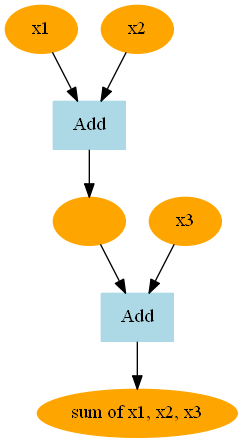

In [26]:
img = Image.open('images/sum.png')
print(img)
img

We can check that the format changes from `RGBA` -> `RGB`

In [17]:
img = img.convert('RGB')
print(img)

<PIL.Image.Image image mode=RGB size=242x443 at 0x1D02E4DC688>


In [19]:
r, g, b = img.split()
r, g, b

(<PIL.Image.Image image mode=L size=242x443 at 0x1D02E4C0748>,
 <PIL.Image.Image image mode=L size=242x443 at 0x1D02E4C0DC8>,
 <PIL.Image.Image image mode=L size=242x443 at 0x1D02E4C0E88>)

Exchange the `R` and `B`!

<PIL.Image.Image image mode=RGB size=242x443 at 0x1D02E49AC88>


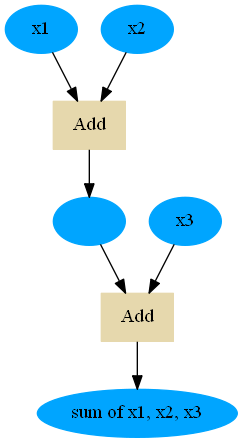

In [23]:
merged_img = Image.merge('RGB', (b, g, r))
print(merged_img)
merged_img

So why we used this way?<br>
-> Because Image doesn't support `BGR` model :)

In [24]:
img = img.convert('BGR')
print(img)

ValueError: conversion from RGB to BGR not supported

### `PIL Image` Transformation - `Resize`

In [ ]:
class Resize:
    """Resize the input PIL image to the given size.
    
    Args:
        size (int or (int, int)): Desired output size
        mode (int): Desired interpolation
    """
    def __init__(self, size, mode=Image.BILINEAR):
        self.size = pair(size)
        self.mode = mode
        
    def __call__(self, img):
        return img.resize(self.size, self.mode)

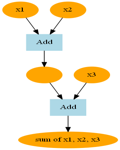

In [33]:
img.resize((120, 150))

Look's cute :)

### `PIL Image` Transformation - `CenterCrop`

In [34]:
class CenterCrop:
    """Resize the input PIL image to the given size.
    
    Args:
        size (int or (int, int)): Desired output size.
        mode (int): Desired interpolation
    """
    def __init__(self, size):
        self.size = pair(size)
        
    def __call__(self, img):
        W, H = img.size
        OW, OH = self.size
        
        left = (W - OW) // 2
        right = W - ((W - OW) // 2 + (W - OW) % 2)
        
        up = (H - OH) // 2
        bottom = H - ((H - OH) // 2 + (H - OH) % 2)
        
        return img.crop((left, up, right, bottom))

In [38]:
W, H = img.size
W, H

(242, 443)

In [42]:
OW, OH = 100, 200
OW, OH

(100, 200)

In [43]:
left = (W - OW) // 2
right = W - ((W - OW) // 2 + (W - OW) % 2)

print(f'left : {left}, right : {right}')

up = (H - OH) // 2
bottom = H - ((H - OH) // 2 + (H - OH) % 2)

print(f'up : {up}, bottom : {bottom}')

left : 71, right : 171
up : 121, bottom : 321


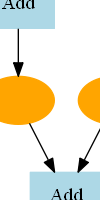

In [44]:
img.crop((left, up, right, bottom))

### `PIL Image` Transformation - `ToArray`

In [45]:
class ToArray:
    """Convert PIL Image to NumPy array."""
    def __init__(self, dtype=np.float32):
        self.dtype = dtype
        
    def __call__(self, img):
        if isinstance(img, np.ndarray):
            return img
        if isinstance(img, Image.Image):
            img = np.asarray(img)
            img = img.transpose(2, 0, 1)
            img = img.astype(self.dtype)
            return img
        else:
            raise TypeError

In [48]:
img = np.asarray(img)
img.shape

(443, 242, 4)

The shape is made as `H, W, C`.<br>
We should turn this to `C, H, W`

In [56]:
numpy_img = img.transpose(2, 0, 1)
numpy_img.shape

(4, 443, 242)

In [54]:
img.dtype, img.astype(np.float32).dtype

(dtype('uint8'), dtype('float32'))

### `PIL Image` Transformation - `ToPIL`

In [55]:
class ToPIL:
    """Convert NumPy Image to PIL array."""
    def __call__(self, array):
        data = array.transpose(1, 2, 0)
        return Image.fromarray(data)

In [58]:
numpy_img.shape

(4, 443, 242)

In [60]:
tranposed_numpy_img = numpy_img.transpose(1, 2, 0)
tranposed_numpy_img.shape

(443, 242, 4)

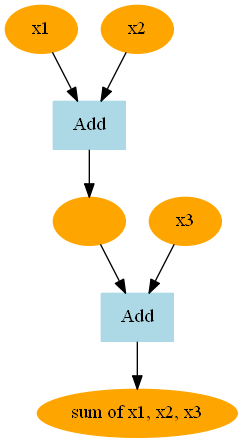

In [61]:
Image.fromarray(tranposed_numpy_img)

Well done :)!

### `NumPy ndarray` Transformation - `Normalize`

In [72]:
class Normalize:
    """Normalize a NumPy array with mean and standard deviation
    
    Args:
        mean (float or sequence): mean for all values or
                                  sequence of means for each channel
        std (float or sequence): standard deviation for all values or
                                 sequence of standard deviation for each channel
    """
    def __init__(self, mean=0, std=1):
        self.mean = mean
        self.std = std
        
    def __call__(self, array):
        mean, std = self.mean, self.std
        
        if not np.isscalar(mean):
            mshape = [1] * array.ndim
            mshape[0] = len(array) if len(self.mean) == 1 else len(self.mean)
            mean = np.array(self.mean, dtype=array.dtype).reshape(*mshape)
            
        if not np.isscalar(std):
            rshape = [1] * array.ndim
            rshape[0] = len(array) if len(self.std) == 1 else len(self.std)
            std = np.array(self.std, dtype=array.dtype).reshape(*rshape)
            
        return (array - mean) / std

In [66]:
numpy_img.shape, numpy_img.ndim

((4, 443, 242), 3)

In [63]:
[1] * numpy_img.ndim

[1, 1, 1]

In [68]:
len(numpy_img)

4

In [77]:
mean = np.array([1, 10, 100, 1000]).reshape(4, 1, 1)
mean

array([[[   1]],

       [[  10]],

       [[ 100]],

       [[1000]]])

In [78]:
numpy_img - mean

array([[[ 254,  254,  254, ...,  254,  254,  254],
        [ 254,  254,  254, ...,  254,  254,  254],
        [ 254,  254,  254, ...,  254,  254,  254],
        ...,
        [ 254,  254,  254, ...,  254,  254,  254],
        [ 254,  254,  254, ...,  254,  254,  254],
        [ 254,  254,  254, ...,  254,  254,  254]],

       [[ 245,  245,  245, ...,  245,  245,  245],
        [ 245,  245,  245, ...,  245,  245,  245],
        [ 245,  245,  245, ...,  245,  245,  245],
        ...,
        [ 245,  245,  245, ...,  245,  245,  245],
        [ 245,  245,  245, ...,  245,  245,  245],
        [ 245,  245,  245, ...,  245,  245,  245]],

       [[ 155,  155,  155, ...,  155,  155,  155],
        [ 155,  155,  155, ...,  155,  155,  155],
        [ 155,  155,  155, ...,  155,  155,  155],
        ...,
        [ 155,  155,  155, ...,  155,  155,  155],
        [ 155,  155,  155, ...,  155,  155,  155],
        [ 155,  155,  155, ...,  155,  155,  155]],

       [[-745, -745, -745, ..., -745,

### `NumPy ndarray` Transformation - `Flatten`

In [79]:
class Flatten:
    """Flatten a NumPy array"""
    def __call__(self, array):
        return array.flatten()

In [81]:
numpy_img.flatten(), numpy_img.flatten().shape

(array([255, 255, 255, ..., 113, 113, 113], dtype=uint8), (428824,))

### `NumPy ndarray` Transformation - `AsType`

In [82]:
class AsType:
    def __init__(self, dtype=np.float32):
        self.dtype = dtype
        
    def __call__(self, array):
        return array.astype(self.dtype)

In [83]:
numpy_img.astype(np.complex128)

array([[[255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j],
        [255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j],
        [255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j],
        ...,
        [255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j],
        [255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j],
        [255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j]],

       [[255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j],
        [255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j],
        [255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j],
        ...,
        [255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j],
        [255.+0.j, 255.+0.j, 255.+0.j, ..., 255.+0.j, 255.+0.j,
         255.+0.j],
        [255.+0.j, 255.+0.j, 255.+0.j, ..., 255.

In [ ]:
ToFloat = AsType

### `NumPy ndarray` Transformation - `ToInt`

In [84]:
class ToInt(AsType):
    def __init__(self, dtype=np.int):
        self.dtype = dtype

## Collection of transforms - `Compose`

In [85]:
class Compose:
    """Compose several transforms.
    
    Args:
        transforms (list): list of transforms
    """
    def __init__(self, transforms=[]):
        self.transforms = transforms
        
    def __call__(self, img):
        if not self.transforms:
            return img
        
        for transform in self.transforms:
            img = transform(img)
            
        return img

## Test!

In [5]:
import dezero
from dezero import transforms

f = transforms.Normalize(mean=0.0, std=2.0)

train_set_transform = dezero.datasets.Spiral(transform=f)
train_set = dezero.datasets.Spiral()

train_set[0], train_set_transform[0]

((array([-0.13981389, -0.00721657], dtype=float32), 1),
 (array([-0.06990694, -0.00360829], dtype=float32), 1))

In [7]:
f = transforms.Compose([transforms.Normalize(mean=0.0, std=2.0),
                        transforms.AsType(np.complex64)])


train_set_transform = dezero.datasets.Spiral(transform=f)
train_set = dezero.datasets.Spiral()

train_set[0], train_set_transform[0]

((array([-0.13981389, -0.00721657], dtype=float32), 1),
 (array([-0.06990694+0.j, -0.00360829+0.j], dtype=complex64), 1))